In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pystan
import pickle
import phasekickstan as p
import h5py
import phasekick
import pmefm
from glob import glob
import lockin
import os
from scipy.optimize import curve_fit, root
from scipy import optimize
from tqdm import tqdm
idx = pd.IndexSlice
from collections import OrderedDict

In [137]:
df = pd.read_csv('../results/pk-efm/151217-205912-p3sun-phasekick.csv')

In [138]:
fh = h5py.File('../results/pk-efm-pystan/test11151217-205912-p3sun-phasekick_exp_sq_nc.h5', 'r')

In [139]:
tau_m = np.mean(fh['params/tau'][:])
phi = p.fh_exp2dphi(fh)
df_fit = p.fh_exp2df(fh)
df_fit_50 = np.mean(df_fit, axis=0)
phi_50 = np.mean(phi, axis=0)
phi_5 = np.percentile(phi, 5, axis=0)
phi_95 = np.percentile(phi, 95, axis=0)

In [140]:
df_d = df[df.expt == 'data']

In [145]:
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(df_fit_50)
tau = fh['params/tau'][:]
df_inf = fh['params/df_inf'][:]
tp = fh['data/t'][:]
line_fits = np.zeros((tau.size, tp.size))
for i in xrange(tau.size):
    line_fits[i] = -tau[i] * df_inf[i] + df_inf[i]*tp

line_50 = np.mean(line_fits, axis=0)
line_5 = np.percentile(line_fits, 5, axis=0)
line_95 = np.percentile(line_fits, 95, axis=0)
tp = fh['data/t'][:]
fig, ax = plt.subplots(figsize=(3,3))
for i in np.random.randint(0, tau.size, 100):
    ax.plot(tp, -tau[i] * df_inf[i] + df_inf[i]*tp, color='0.5', alpha=0.2)

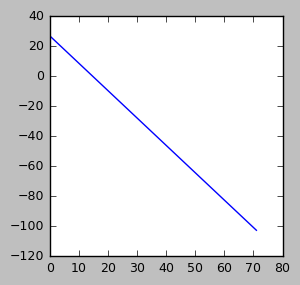

In [148]:
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(line_50)
fig

In [255]:
mpl.markers?

In [282]:
mpl.rc('font', size=9)

with mpl.rc_context({'text.usetex': True}):
    fig = plt.figure(figsize=(1., 1.))
    plt.axhline(color='0.5', zorder=0)
    plt.scatter(df_d.tp[1:-1:2]*1e3, df_d['dphi_corrected [cyc]'][1:-1:2]*1e3, s=6, color='b',linewidths=0.5)
    plt.scatter(df_d.tp.values[-1]*1e3,
                            df_d['dphi_corrected [cyc]'].values[-1]*1e3,
                            marker='*', s=9, color='b', linewidths=0.5)
#     line, = plt.plot(df_d.tp*1e3, phi_50, 'g-', zorder=0)
#     plt.fill_between(df_d.tp*1e3, phi_5, phi_95, color=line.get_color(), alpha=0.3, zorder=0)
    plt.plot(tp[14:], line_50[14:], 'g-', zorder=0, alpha=0.5)
#     plt.fill_between(tp[12:], line_5[12:], line_95[12:], color='g', alpha=0.3,  linewidth=0)
    plt.yticks(np.arange(-100, 1, 50))
    plt.xlim(0, 10.7)
    plt.ylim(-120, 30)
    plt.xticks([0, 5, 10])
    plt.ylabel('$\\Delta \\phi \\: \\: [\\mathrm{mcyc.}]$')
    plt.xlabel('$t_{\\mathrm{p}} \\: \\: [\\mathrm{ms}]$')

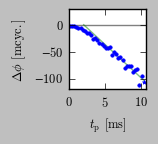

In [283]:
fig

In [284]:
fig.savefig('/Users/ryandwyer/Dropbox/_JAM_MS__Dwyer201511__Phasekick__figs/raw-figures/single-delta-phase.pdf',
           bbox_inches='tight', transparent=True)

In [111]:
fig, ax = plt.subplots()
plt.plot(df_d.tp*1e3, df_d['dphi_corrected [cyc]']/df_d.tp, '.')


In [112]:
dphi_avg = (df_d['dphi_corrected [cyc]'].values[0::4] + df_d['dphi_corrected [cyc]'].values[1::4] +
df_d['dphi_corrected [cyc]'].values[2::4] + df_d['dphi_corrected [cyc]'].values[3::4])/4

In [113]:
tp_avg = 250*(df_d.tp.values[0::4] + df_d.tp.values[1::4] + df_d.tp.values[2::4] + df_d.tp.values[3::4]) 

In [114]:
plt.plot(df_d.tp*1e3)

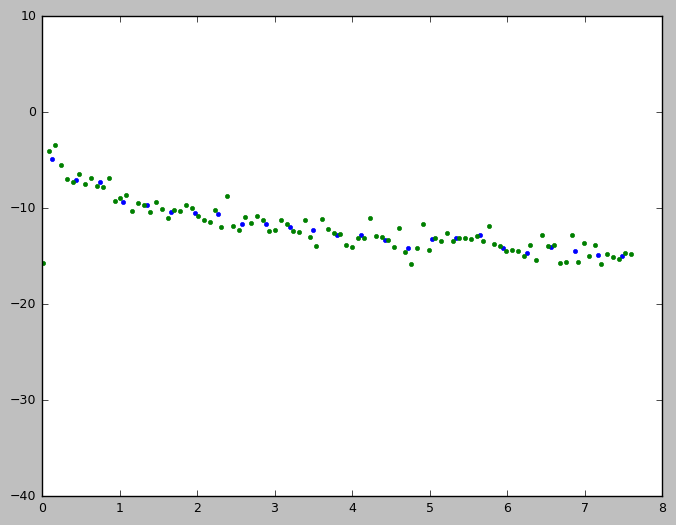

In [120]:
fig = plt.figure()
plt.plot(tp_avg, dphi_avg/tp_avg*1000, 'b.')
plt.plot(df_d.tp.values*1e3, df_d['dphi_corrected [cyc]'].values/df_d.tp.values, 'g.')
plt.ylim(-40, 10)
fig

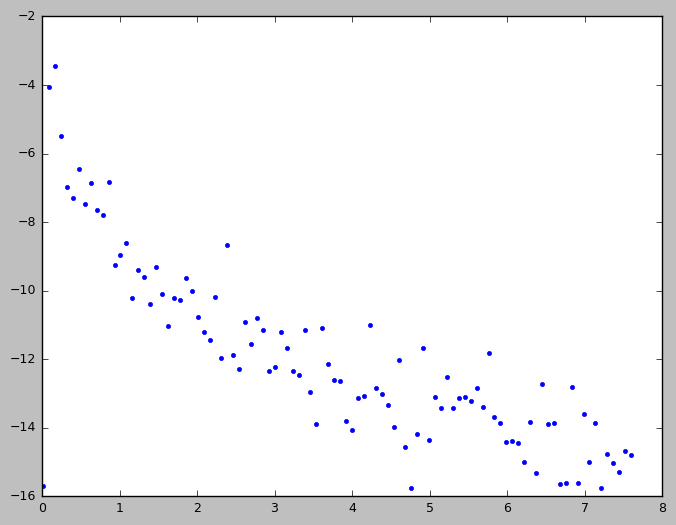

In [118]:
fig = plt.figure()
fig